In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Consider a trinomial tree similar to the one from the slides with just one period ($T=1$) and one step in the pricing process ($N=1$). Also, with the following parameters: $u=1.2$, $d=1/u$, $m=1$ and $S_0=100$

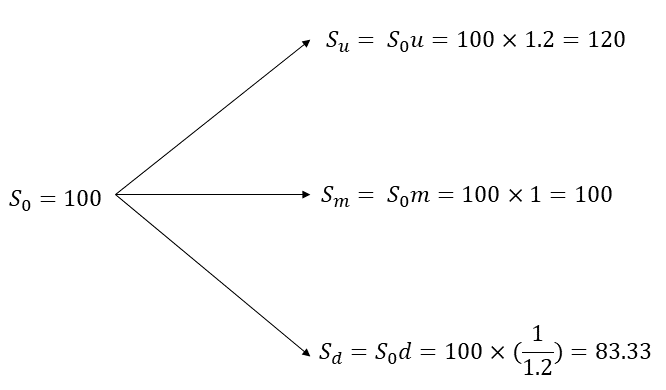

In [3]:
nb = 3  # number of periods (T=1)
up = 1.2  # up movement
down = 1 / up  # down movement to force a "recombining tree"
s0 = 100

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # putting together the last period tree underlyings ("nb-period")
res *= s0  # multiplying all by S0
print(res)

[ 57.87037037  69.44444444  83.33333333 100.         120.
 144.         172.8       ]


In the case of having a two-step model, this would be:

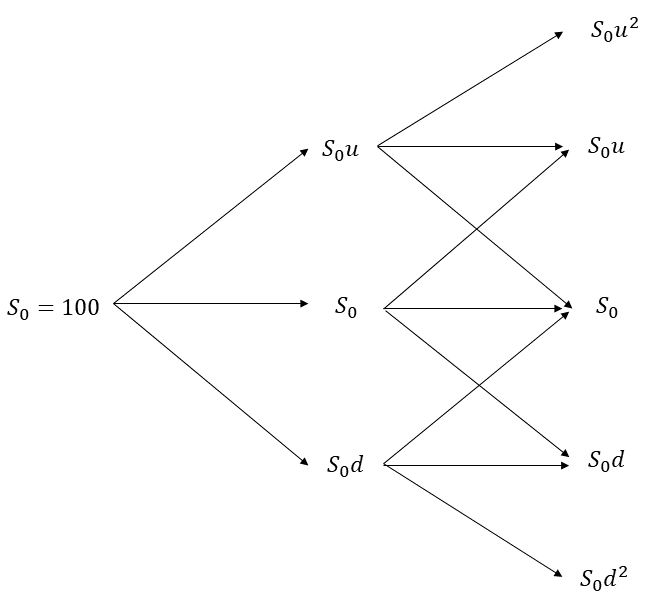

In [4]:
nb = 2  # number of periods (T=2)
up = 1.2  # up movement
down = 1 / up  # down movement to force a "recombining tree"
s0 = 100

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # putting together the last period tree underlyings ("nb-period")
res *= s0
print(res)

[ 69.44444444  83.33333333 100.         120.         144.        ]


In [5]:
def _gen_stock_vec(nb, up):
    s0 = 100
    down = 1 / up
    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [6]:
nb = (
    5  # In this example, np means "periods" because we are not matching volatility yet.
)

for i in range(1, nb + 1):
    vec_stock = _gen_stock_vec(nb - i, 1.2)
    print(vec_stock)

[ 48.22530864  57.87037037  69.44444444  83.33333333 100.
 120.         144.         172.8        207.36      ]
[ 57.87037037  69.44444444  83.33333333 100.         120.
 144.         172.8       ]
[ 69.44444444  83.33333333 100.         120.         144.        ]
[ 83.33333333 100.         120.        ]
[100.]


## 2. Matching Volatility in the Trinomial Tree

In [7]:
s0 = 100
sigma = 0.3
T = 1
nb = 10
h = (
    T / nb
)  # We now consider the number of time-step in each period (this would be our 'dt' )
up = np.exp(sigma * np.sqrt(2 * h))  # We match the volatility
down = 1 / up  # Down movement to force a "recombining tree"

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # Putting together the last period tree underlying evolution
res *= s0
print(res)

[ 26.1416388   29.89506684  34.18741373  39.09605769  44.7094869
  51.12889477  58.47000405  66.86515303  76.46568122  87.44465748
 100.         114.35804414 130.77762259 149.55473137 171.02786571
 195.58412216 223.66617674 255.78026512 292.50530849 334.50334979
 382.5314884 ]


In [8]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.3
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [9]:
nb = 3  # 3-steps in 1 "year" (assuming parameters are all annualized)
h = 1 / nb
for i in range(1, nb + 1):
    vec_stock = _gen_stock_vec(nb - i, h)
    print(vec_stock)

[ 61.26889168  78.27444773 100.         127.75561233 163.21496482]
[ 78.27444773 100.         127.75561233]
[100.]
